In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [2]:
from prd_sample_utils import sample_data, seperate_target_feature

### Load data

In [3]:
data_dir = pathlib.Path('/project/informatics_lab/precip_rediagnosis/')

In [4]:
data = pd.read_csv(
    data_dir / 'prd_merged_015H_20200215T0300Z_20200217T0900Z.csv',
    index_col=0)

In [5]:
target_parameter = 'rainfall_rate_composite'
profile_features = ['air_temperature', 'relative_humidity'] #'cloud_volume_fraction_in_atmosphere_layer']
single_lvl_features = ['cloud_area_fraction']#['air_pressure_at_sea_level', ] 

### Data pre-processing

In [6]:
# drop NaN values in the dataset
data = data.dropna()

# drop data points with zero precip in the radar data
data = data[data[target_parameter]>0]

### Split data samples

In [9]:
test_outfn = 'prd_test_015H_20200215T0300Z_20200217T0900Z.csv'
training_data = sample_data(data, test_fraction=0.2, savefn=test_outfn, random_state=0)
training_data, val_data = sample_data(training_data, test_fraction=0.25, random_state=0)

if len(single_lvl_features) > 0:
    X_train, y_train = seperate_target_feature(training_data, target_parameter, profile_features, profiles=True)
    X_train_snglvl, y_train = seperate_target_feature(training_data, target_parameter, single_lvl_features)
    X_train = [X_train, X_train_snglvl]
    
    X_val, y_val = seperate_target_feature(val_data, target_parameter, profile_features, profiles=True)
    X_val_snglvl, y_val = seperate_target_feature(val_data, target_parameter, single_lvl_features)
    X_val = [X_val, X_val_snglvl]
    
else:
    X_train, y_train = seperate_target_feature(training_data, target_parameter, profile_features, profiles=True)
    X_val, y_val = seperate_target_feature(val_data, target_parameter, profile_features, profiles=True)

Code to format test dataset when loading for final testing

In [10]:
test_data = pd.read_csv('prd_test_015H_20200215T0300Z_20200217T0900Z.csv')
if len(single_lvl_features) > 0:
    X_test, y_test = seperate_target_feature(test_data, target_parameter, profile_features, profiles=True)
    X_test_snglvl, y_test = seperate_target_feature(test_data, target_parameter, single_lvl_features)
    X_test = [X_test, X_test_snglvl]
else:
    X_test, y_test = seperate_target_feature(test_data, target_parameter, profile_features, profiles=True)

### Assess sample distributions

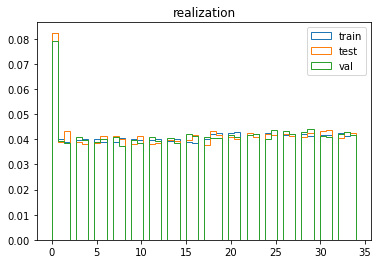

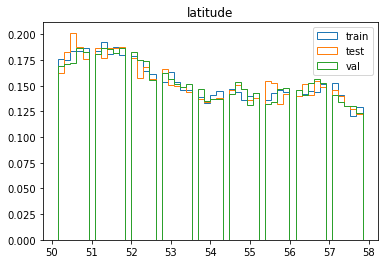

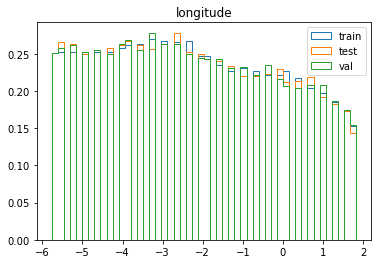

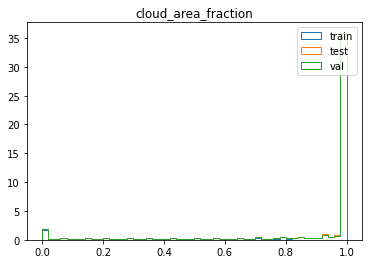

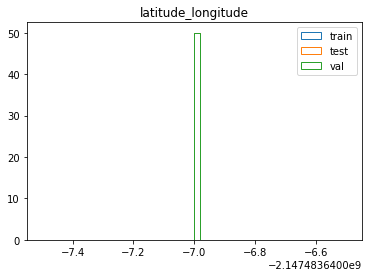

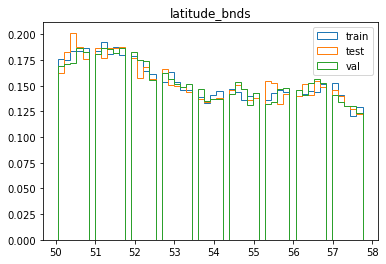

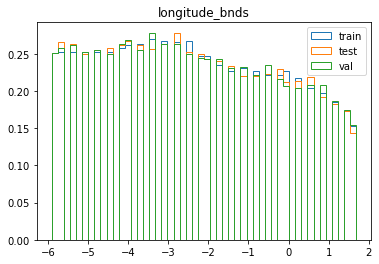

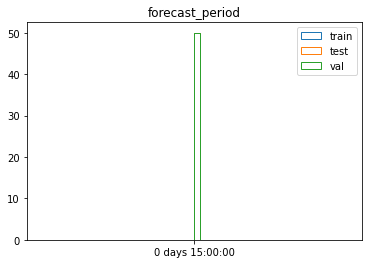

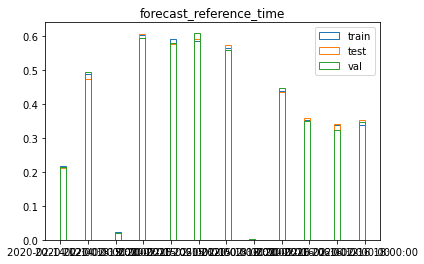

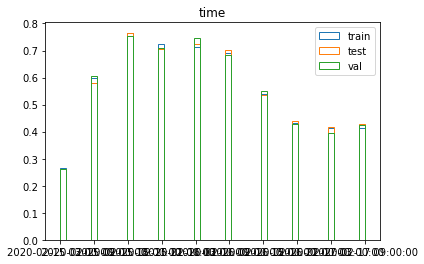

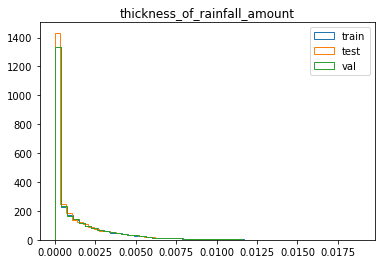

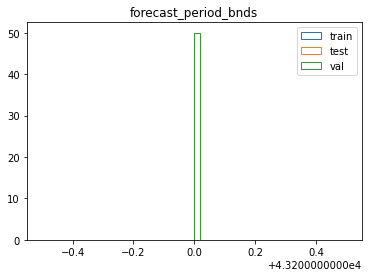

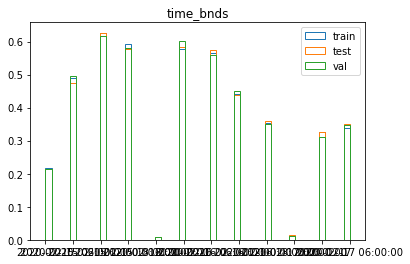

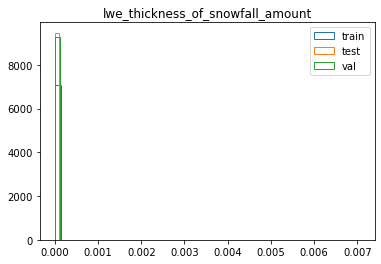

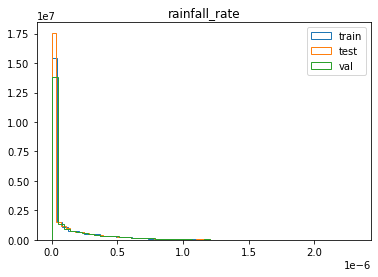

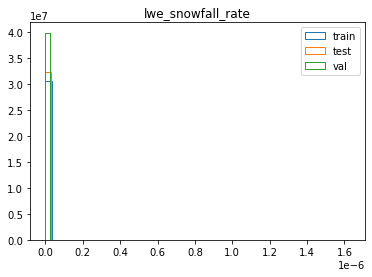

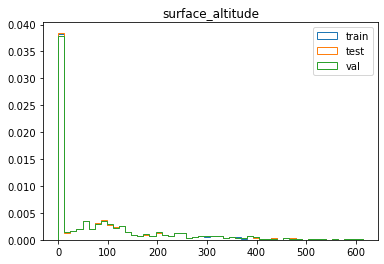

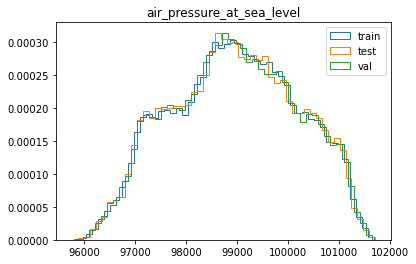

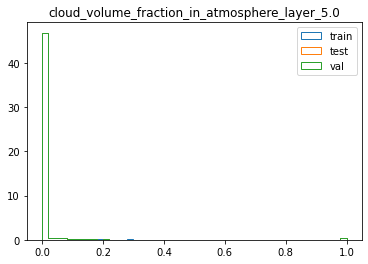

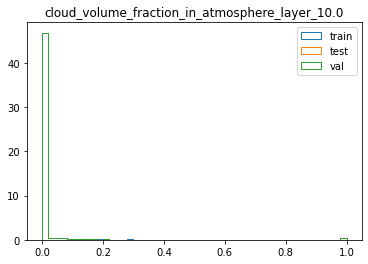

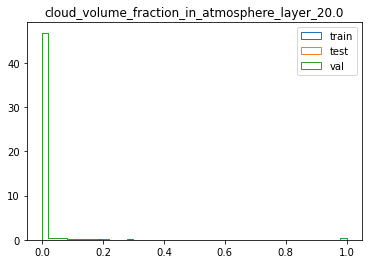

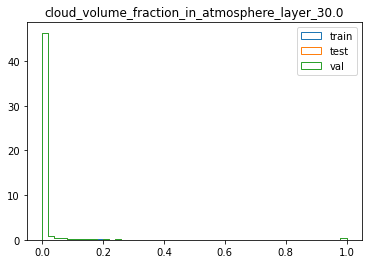

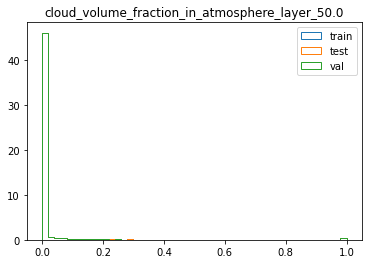

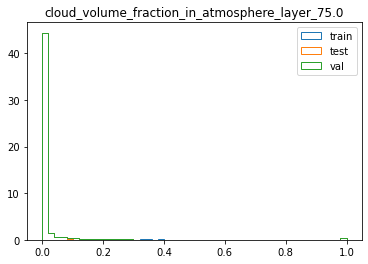

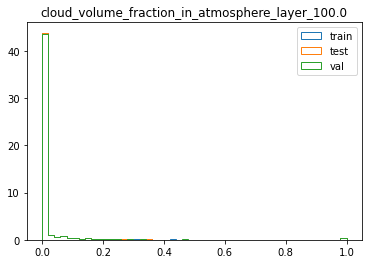

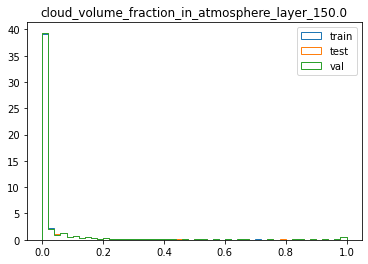

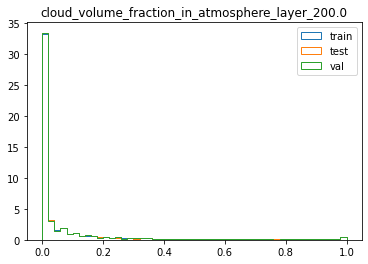

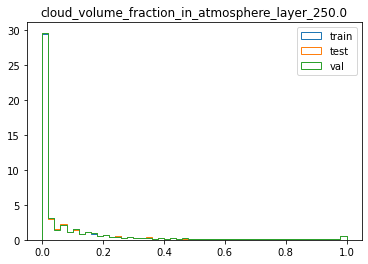

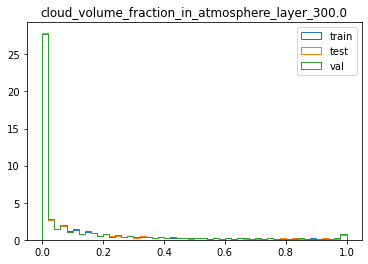

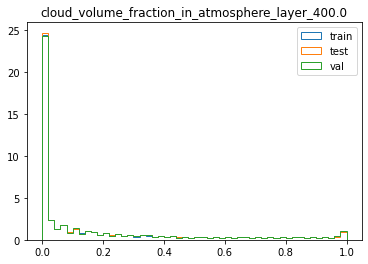

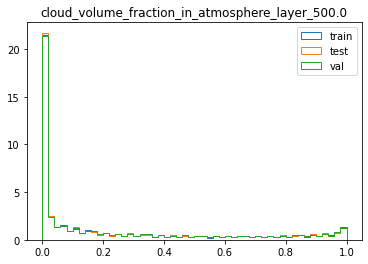

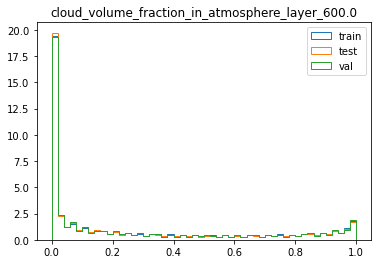

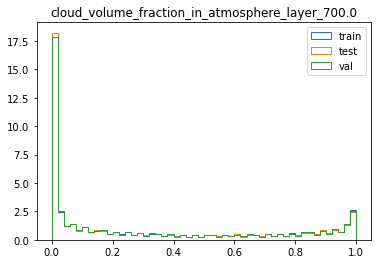

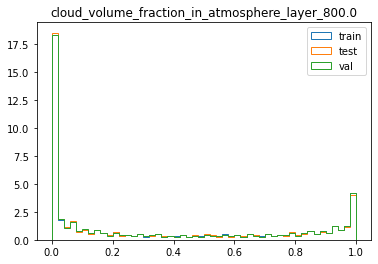

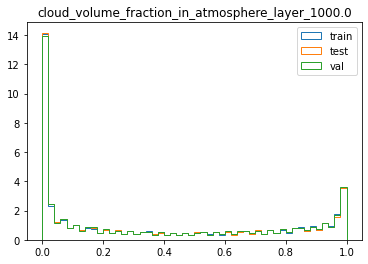

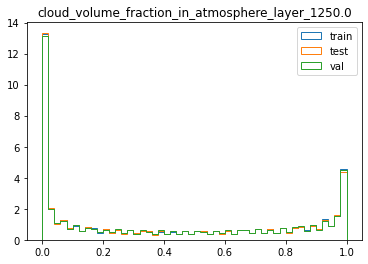

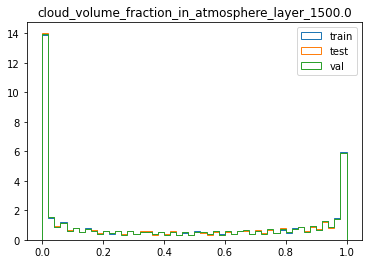

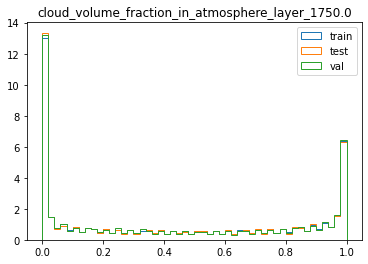

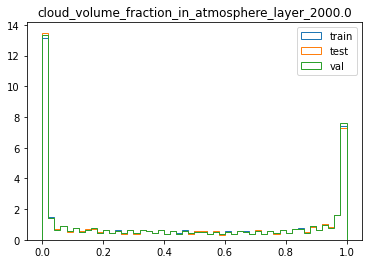

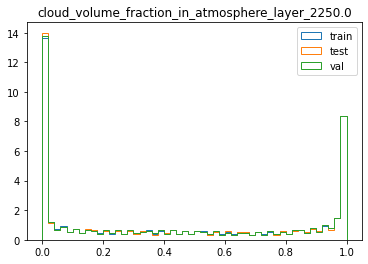

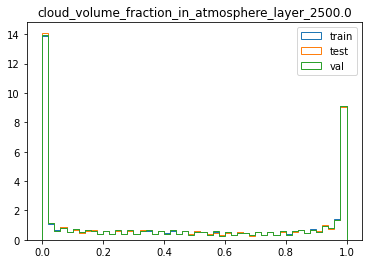

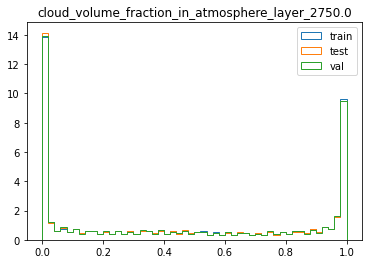

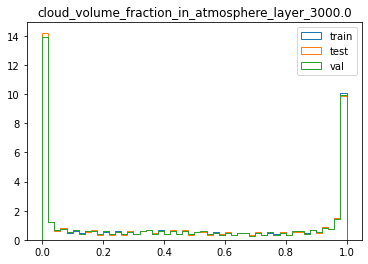

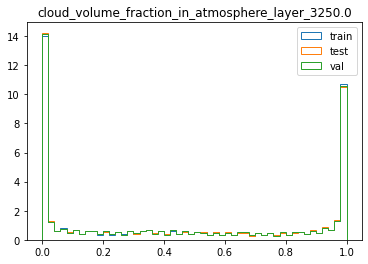

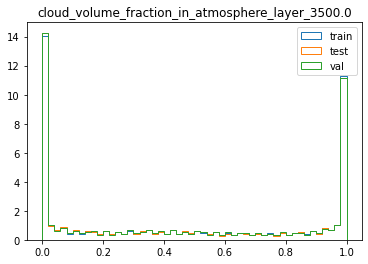

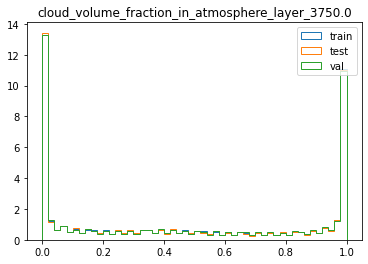

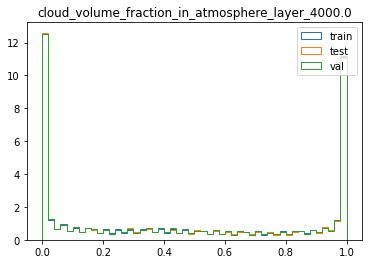

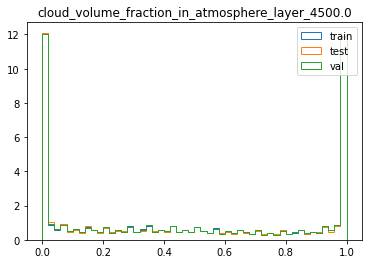

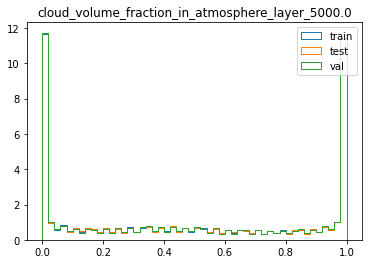

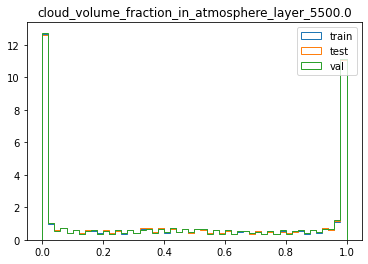

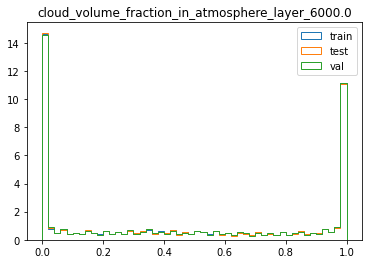

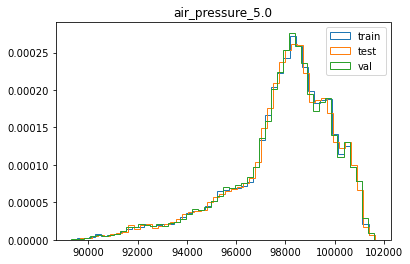

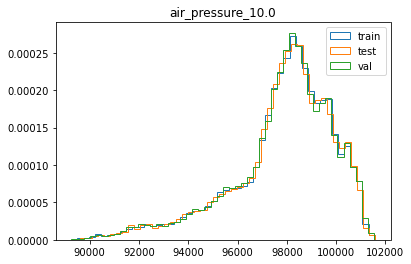

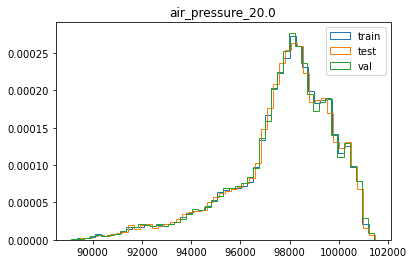

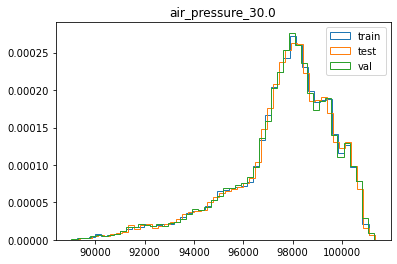

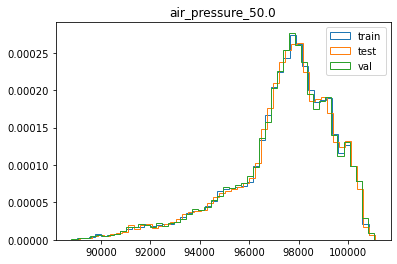

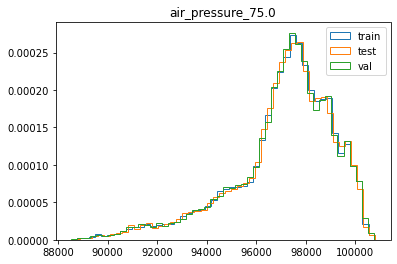

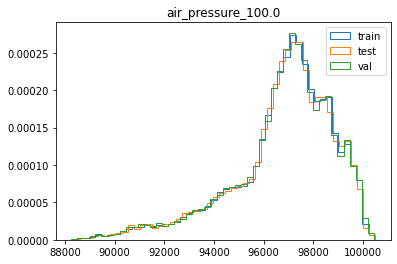

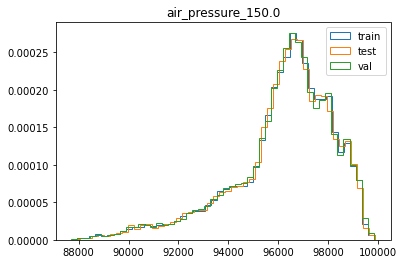

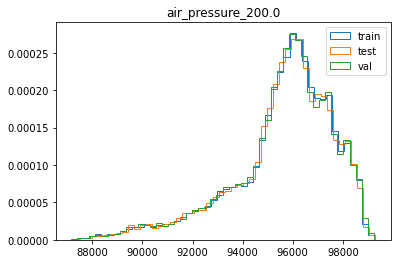

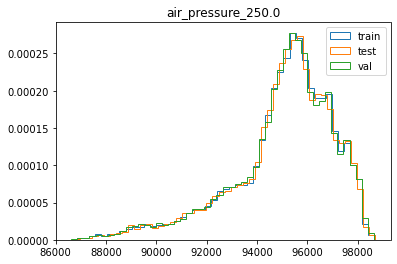

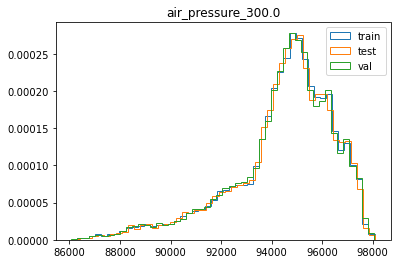

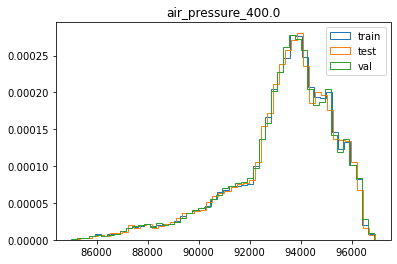

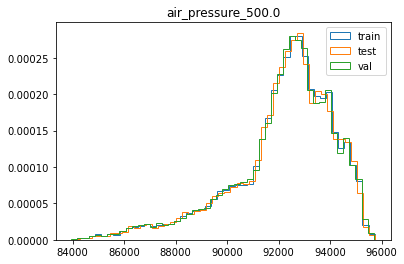

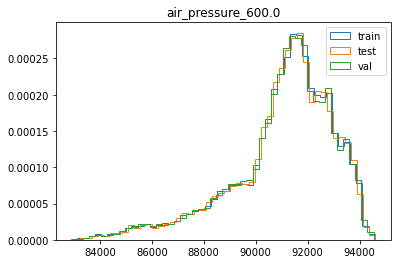

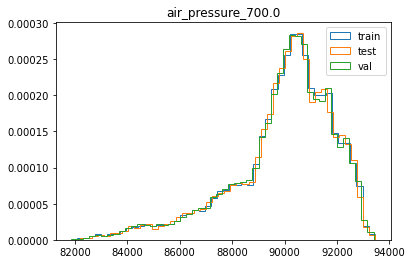

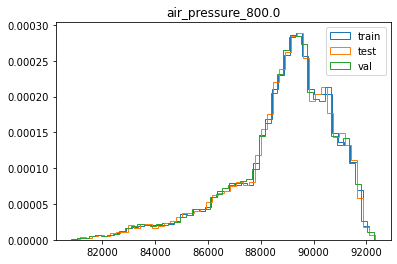

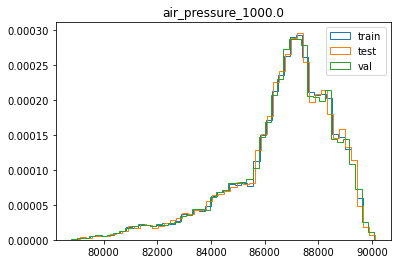

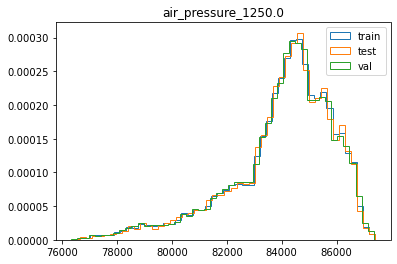

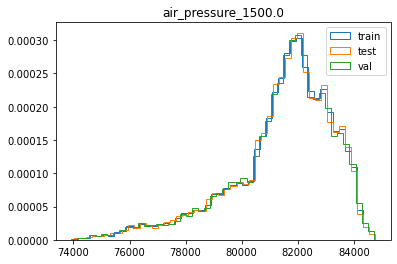

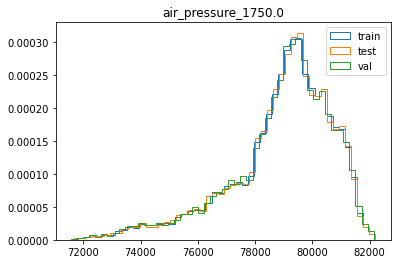

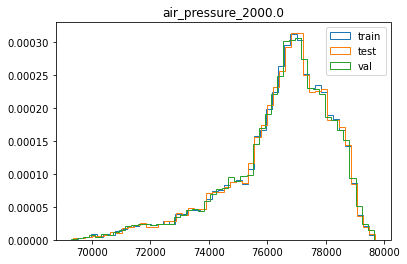

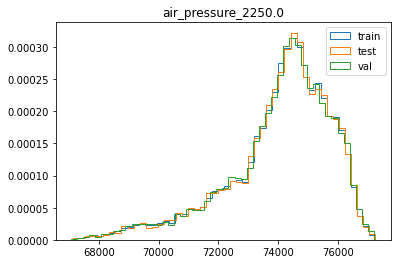

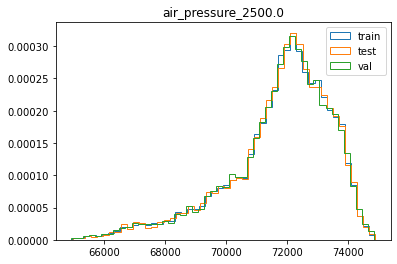

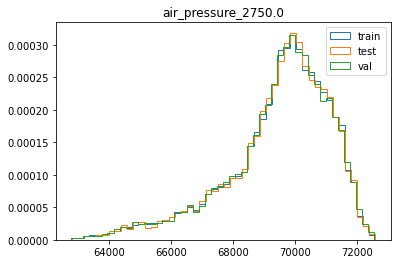

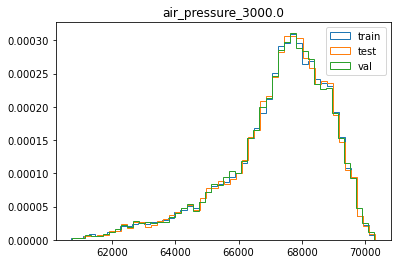

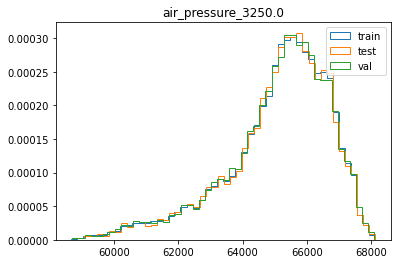

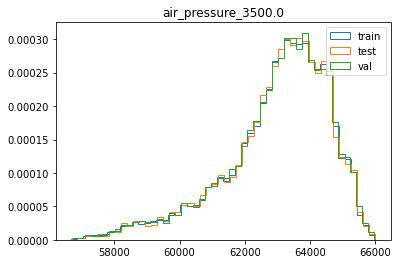

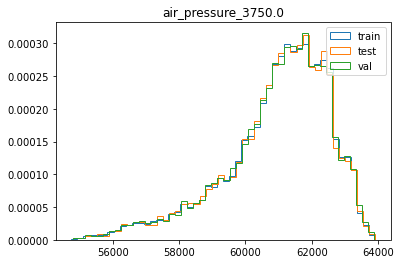

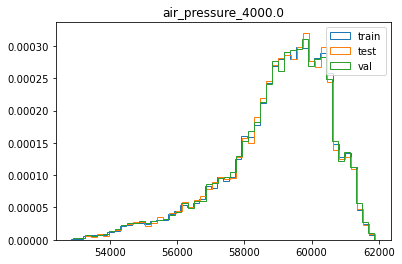

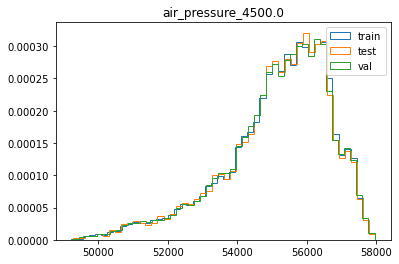

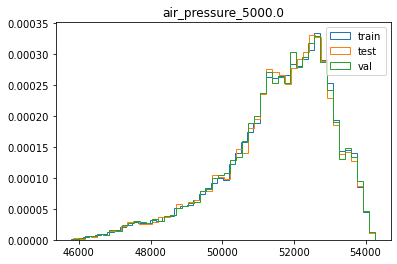

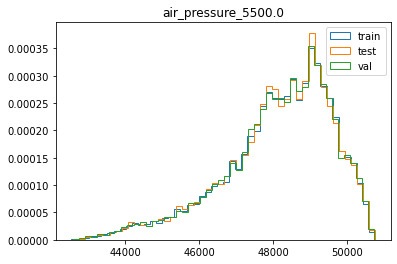

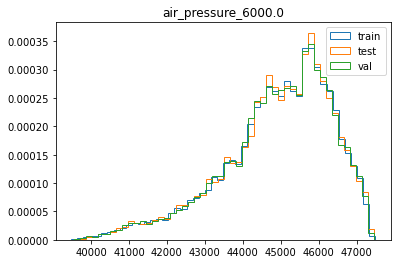

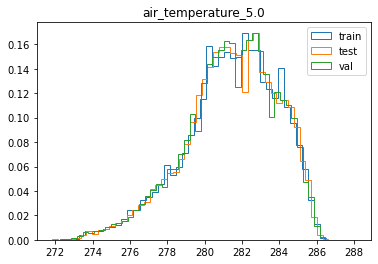

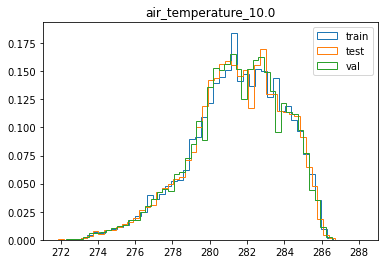

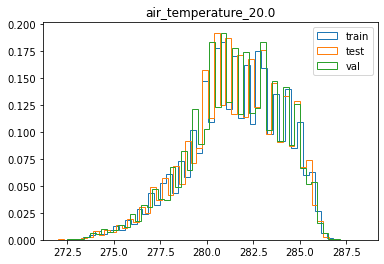

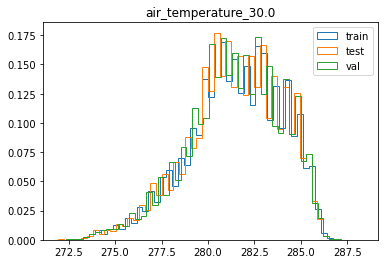

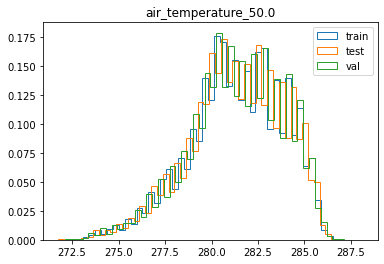

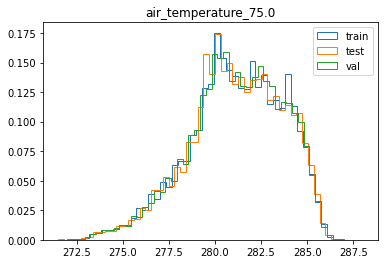

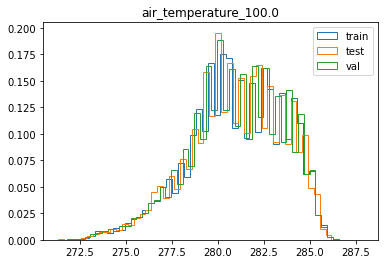

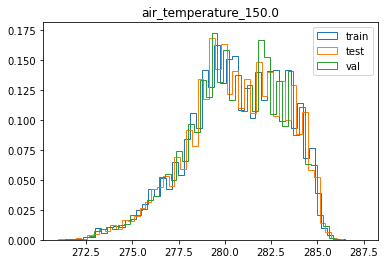

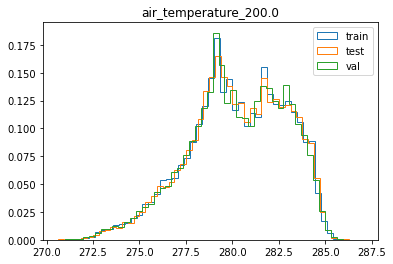

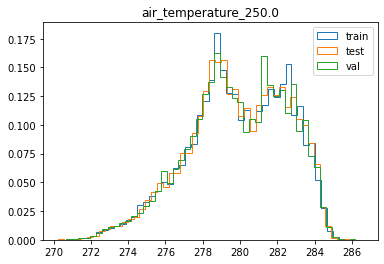

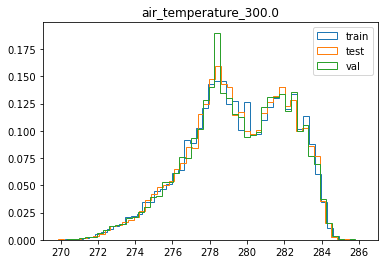

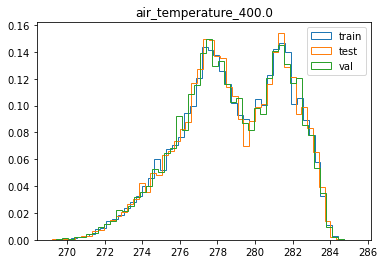

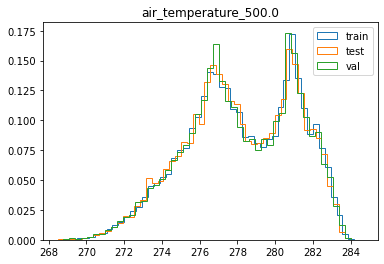

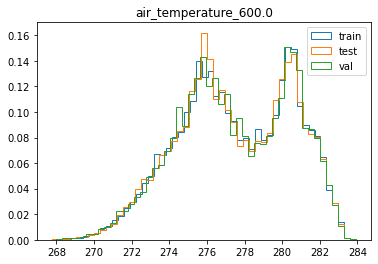

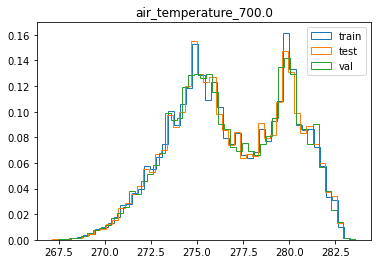

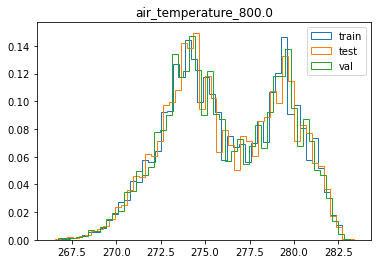

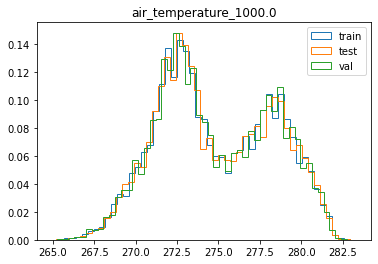

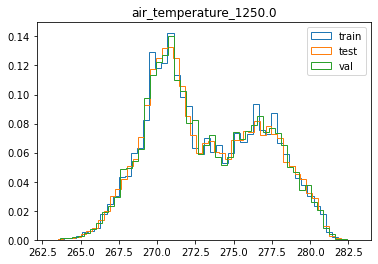

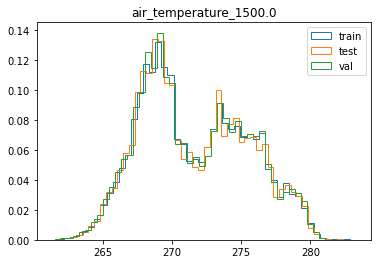

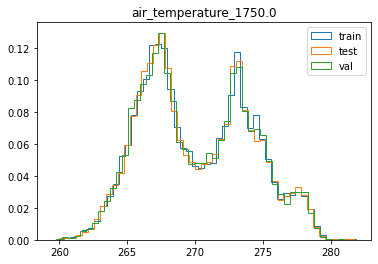

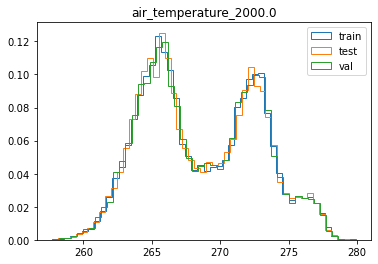

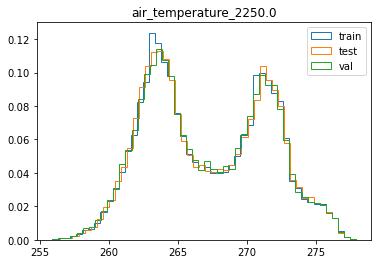

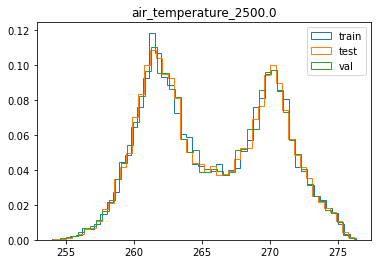

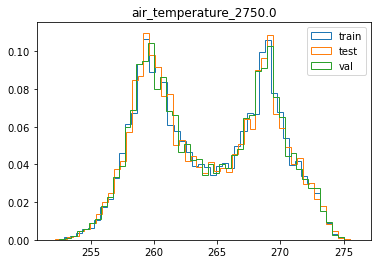

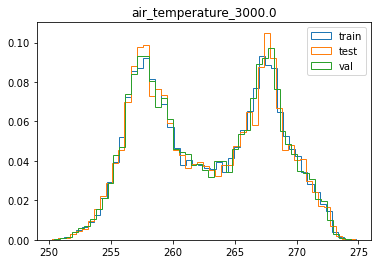

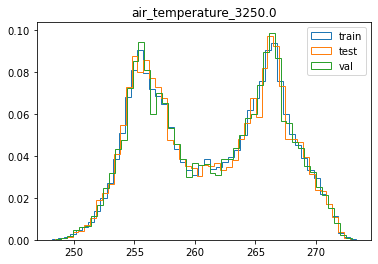

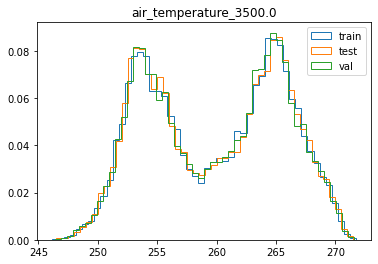

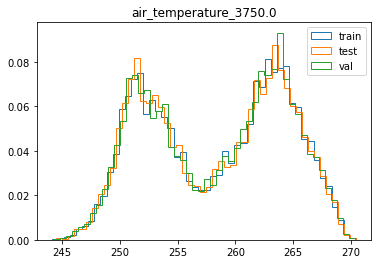

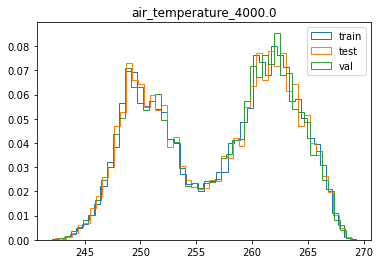

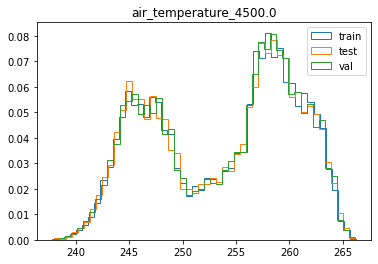

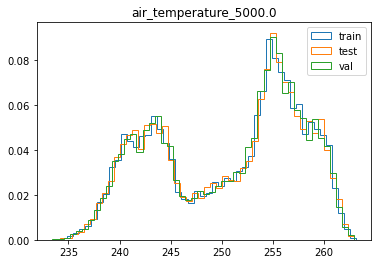

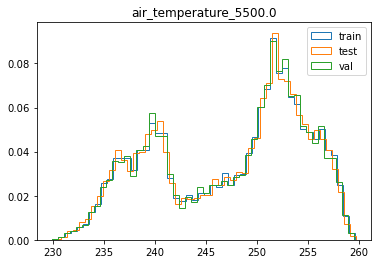

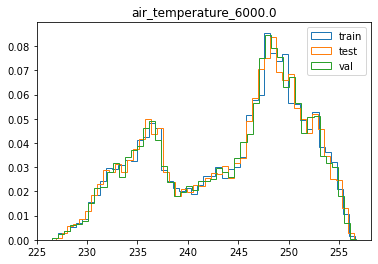

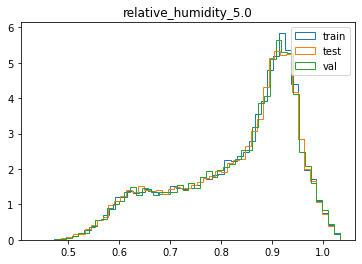

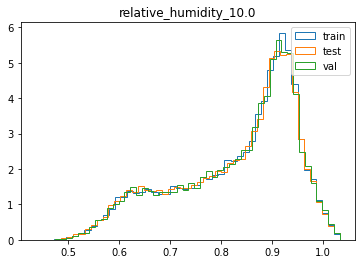

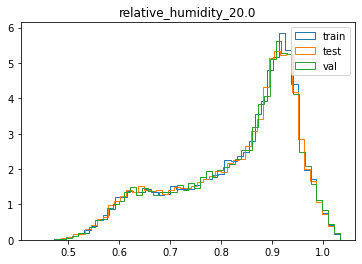

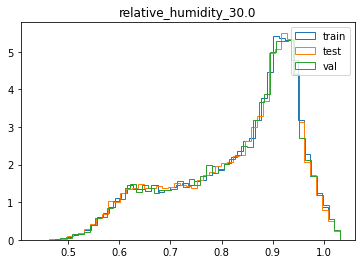

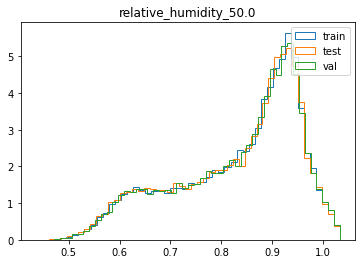

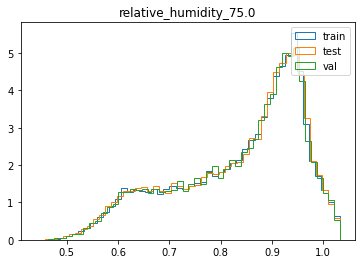

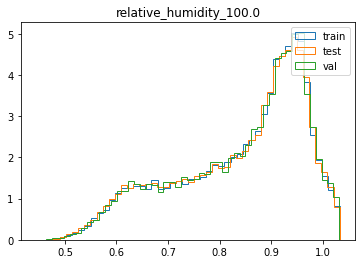

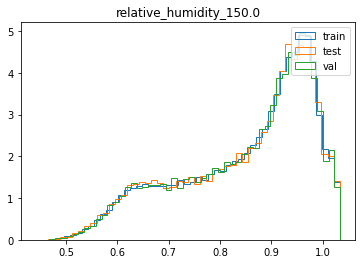

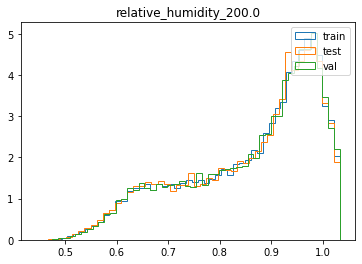

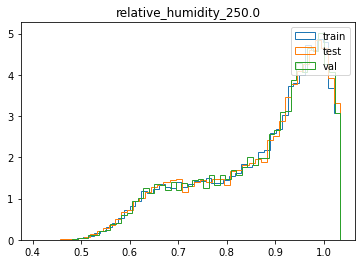

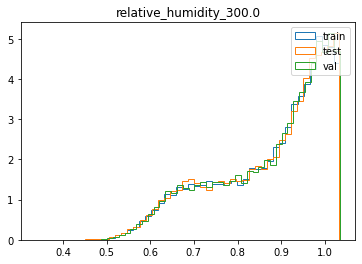

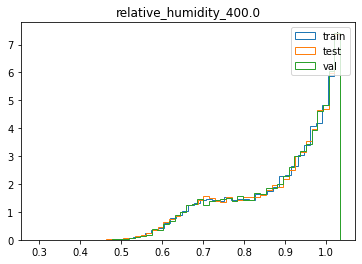

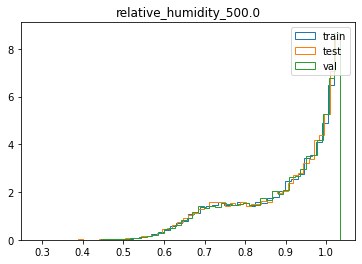

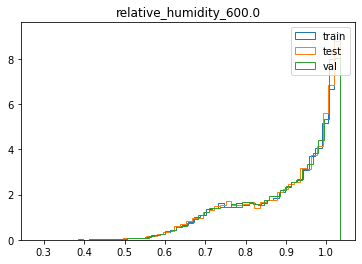

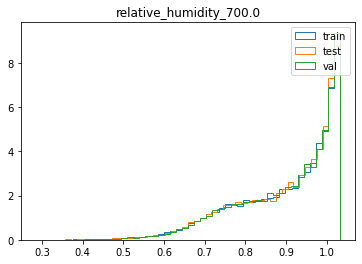

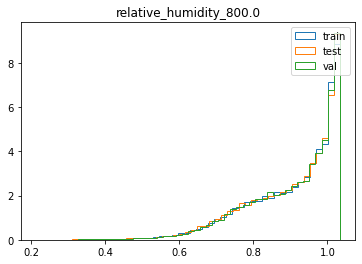

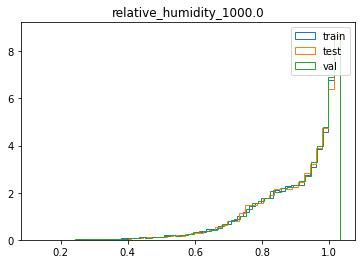

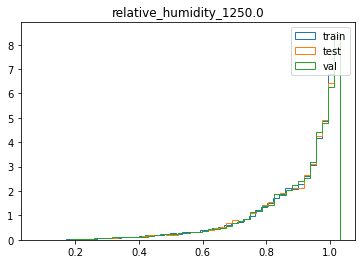

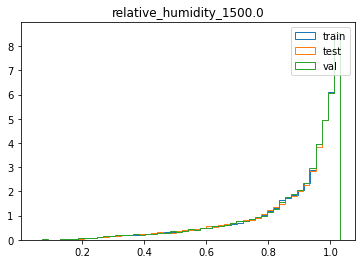

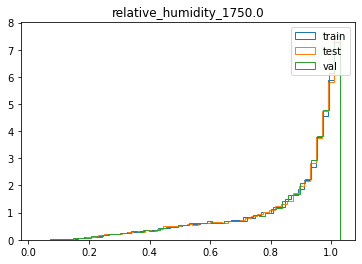

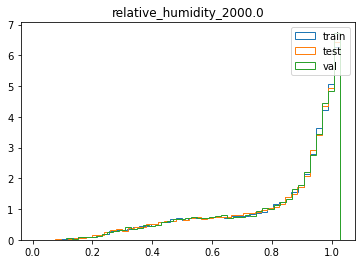

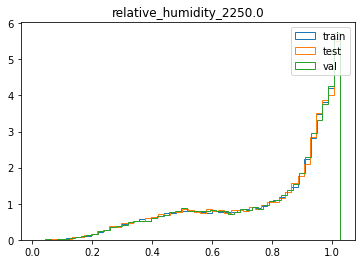

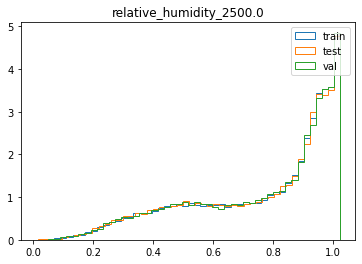

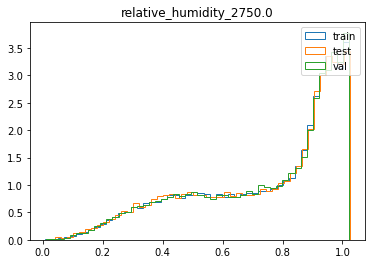

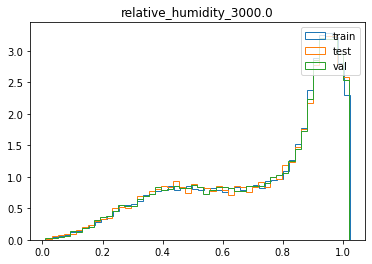

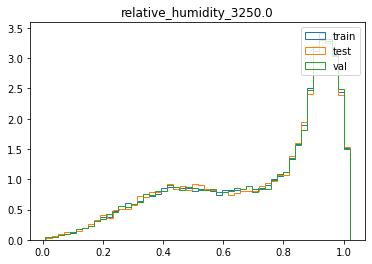

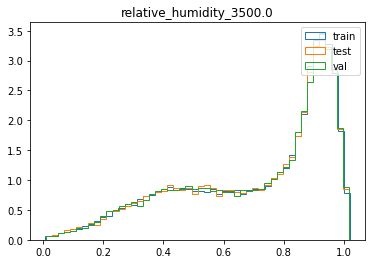

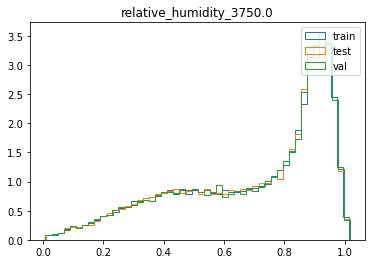

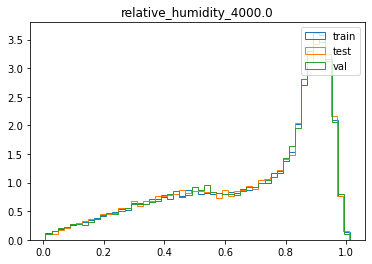

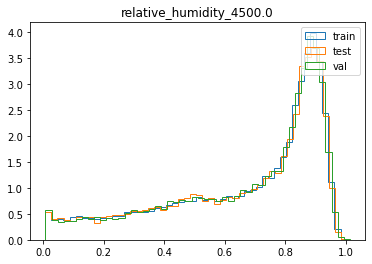

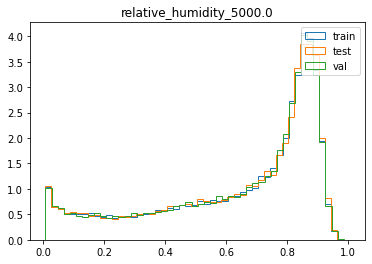

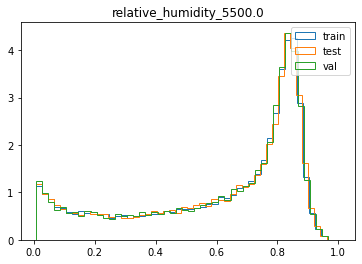

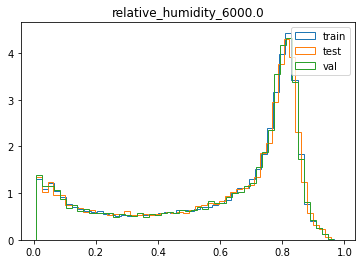

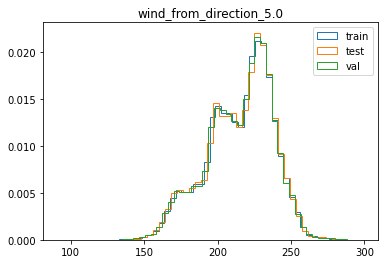

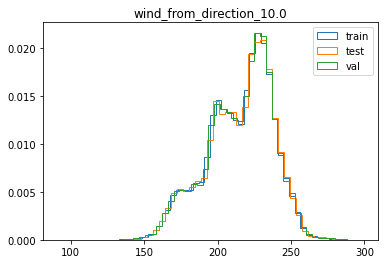

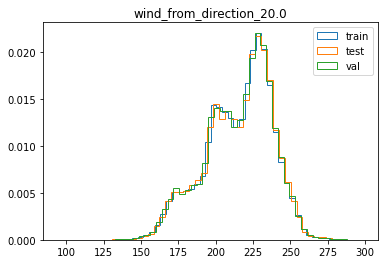

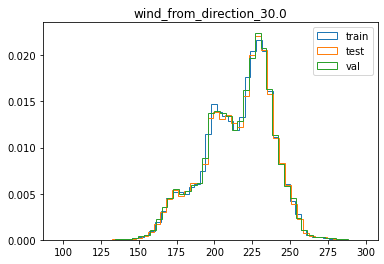

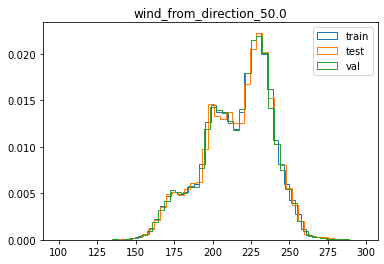

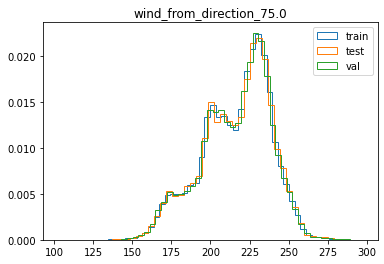

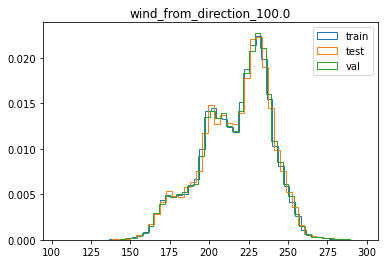

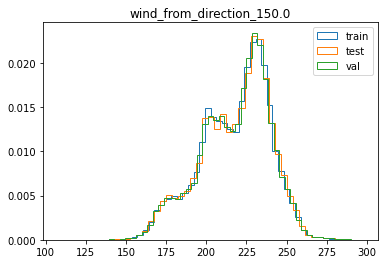

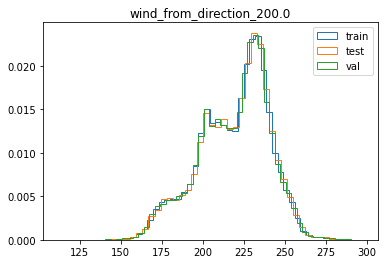

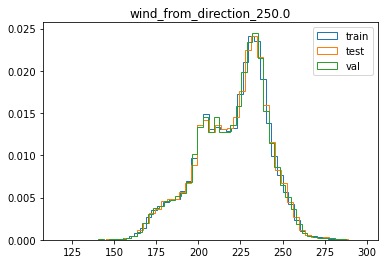

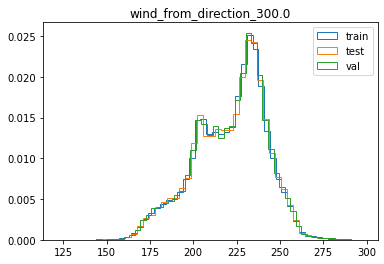

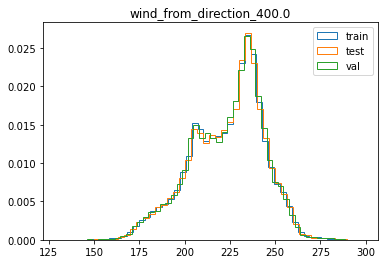

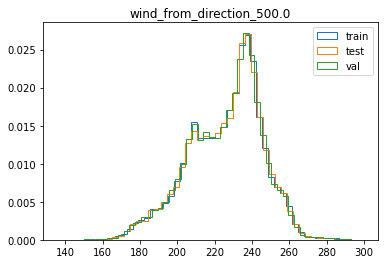

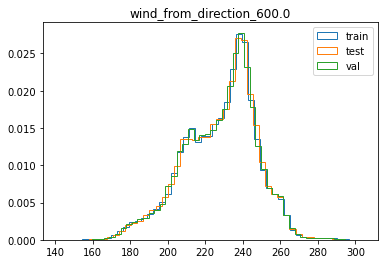

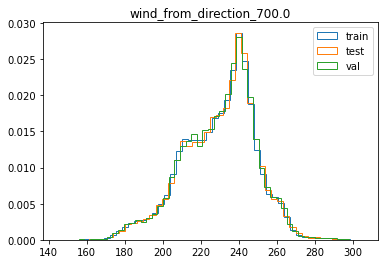

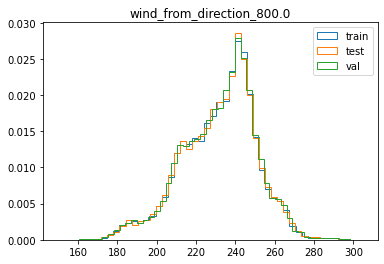

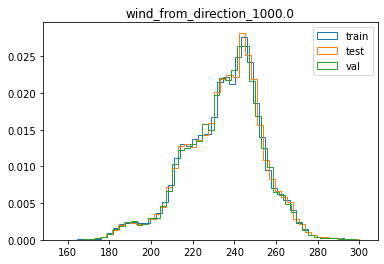

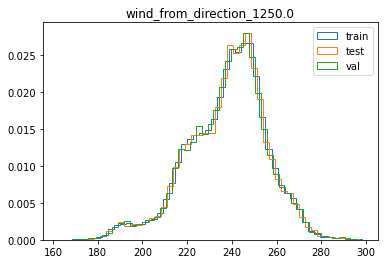

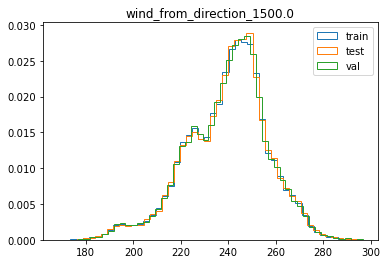

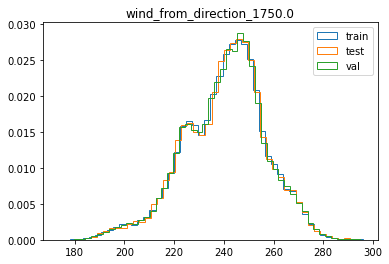

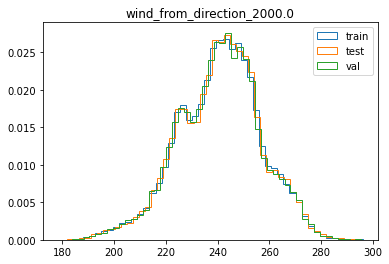

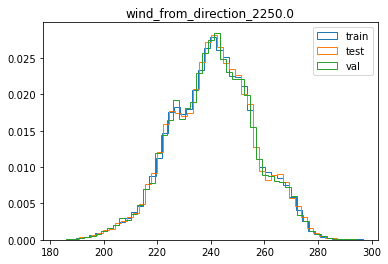

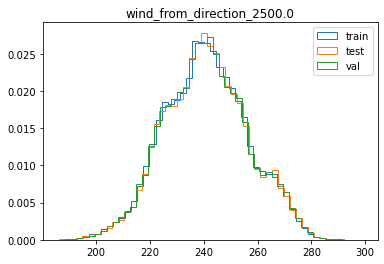

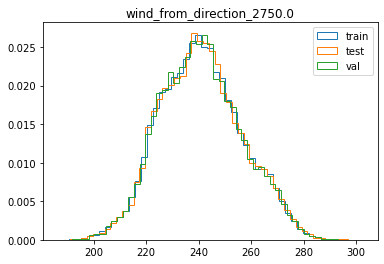

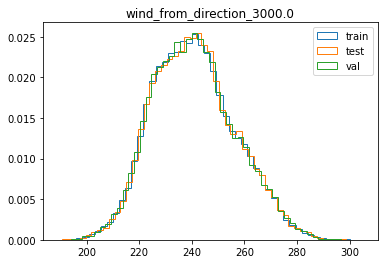

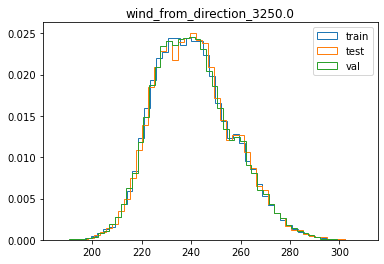

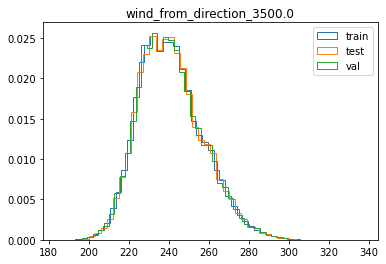

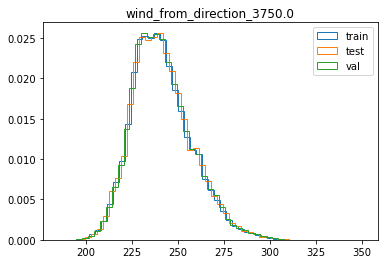

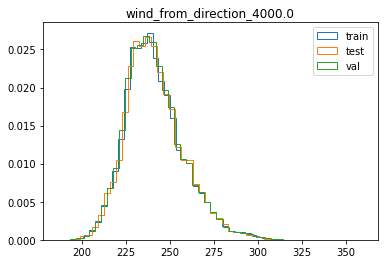

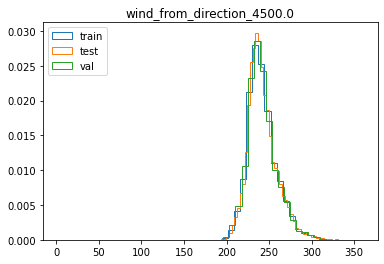

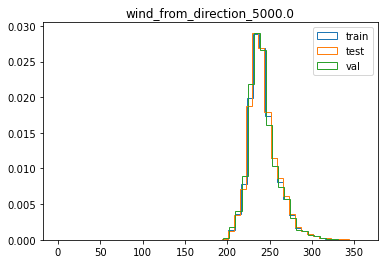

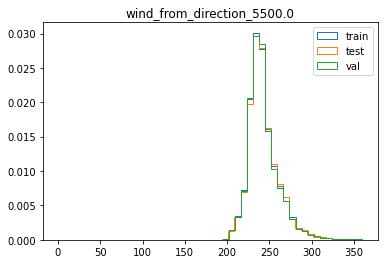

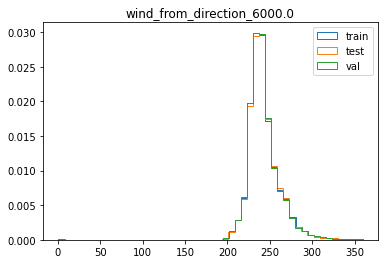

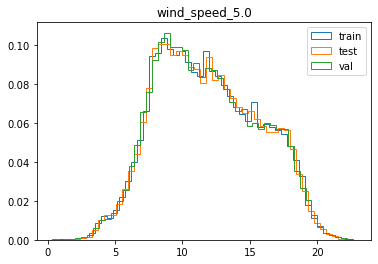

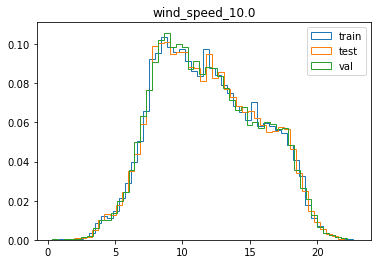

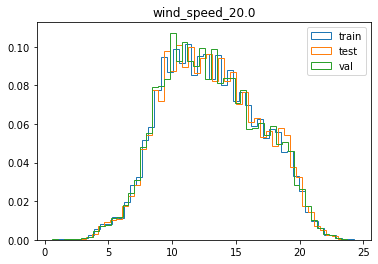

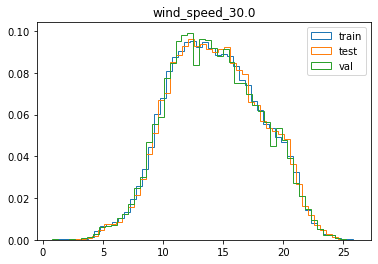

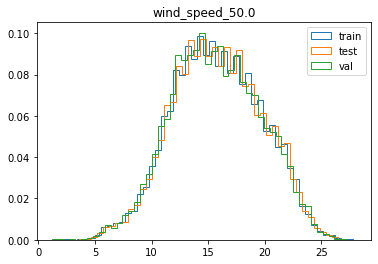

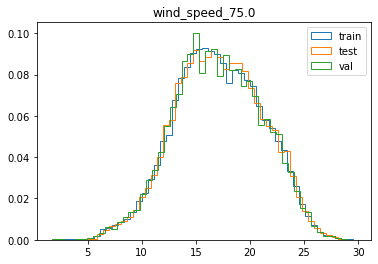

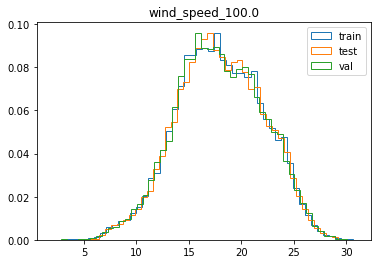

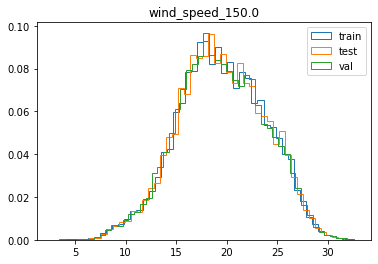

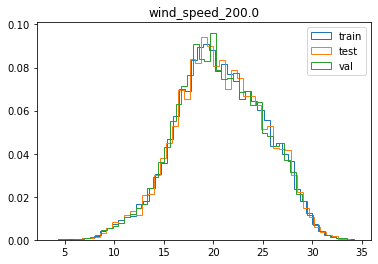

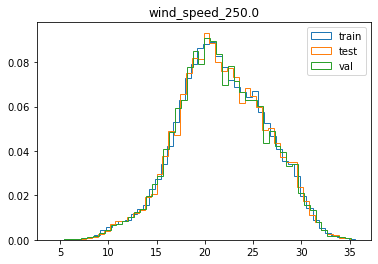

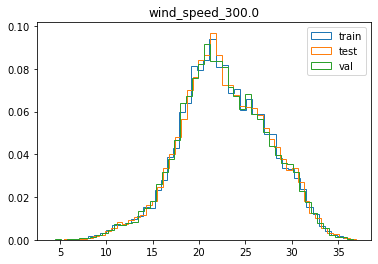

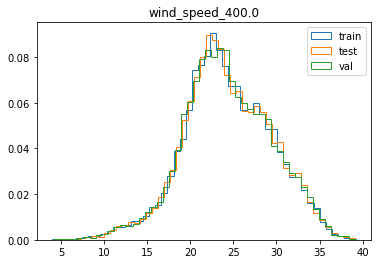

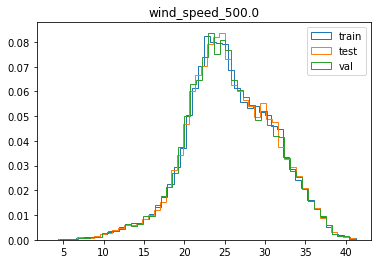

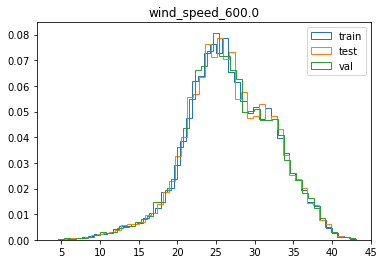

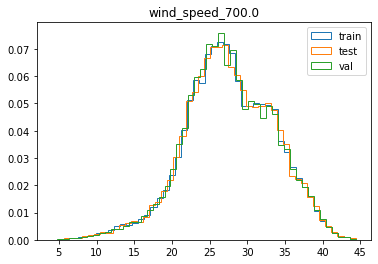

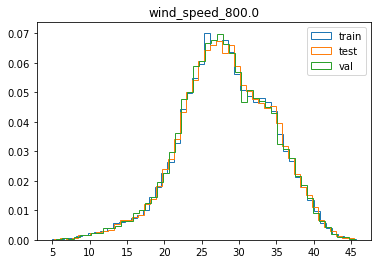

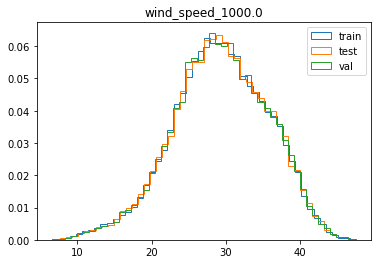

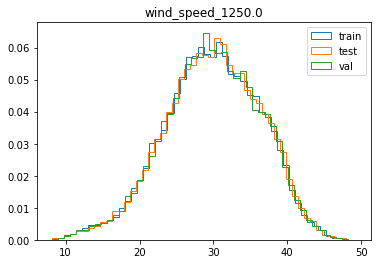

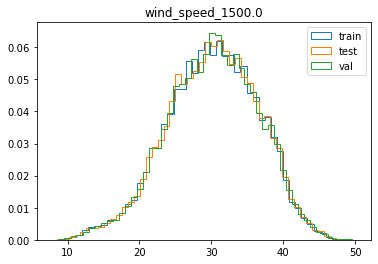

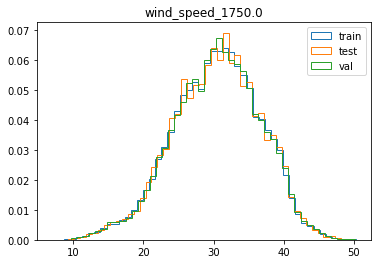

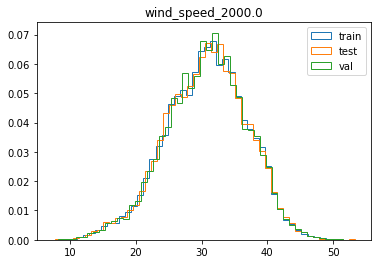

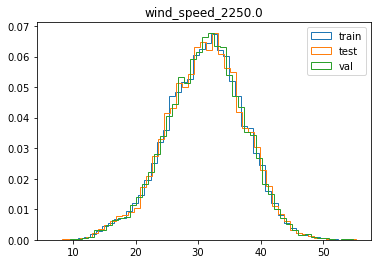

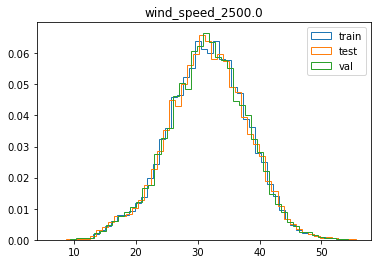

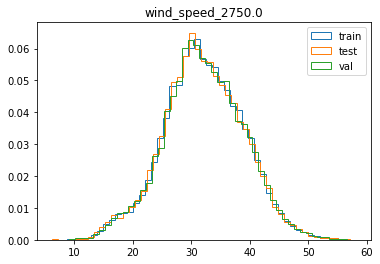

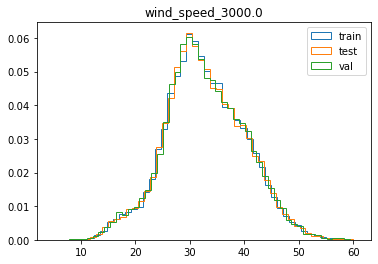

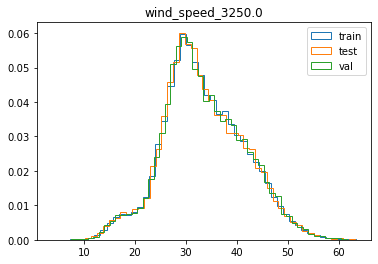

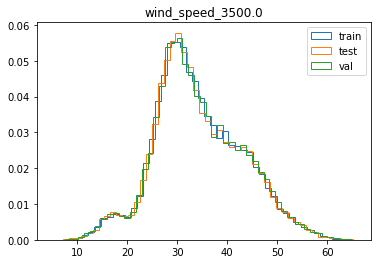

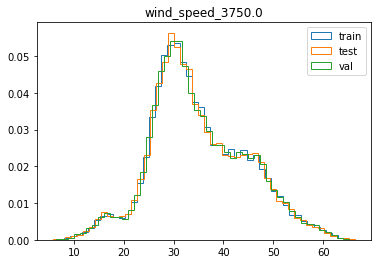

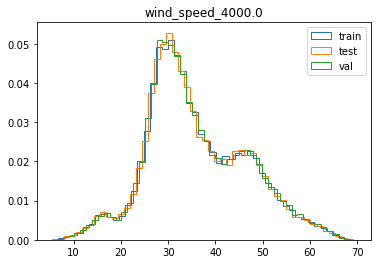

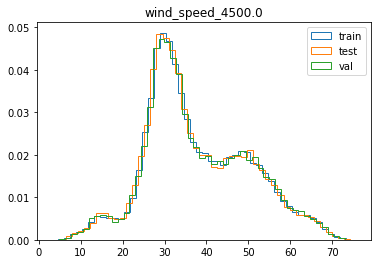

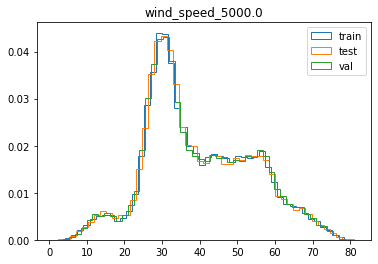

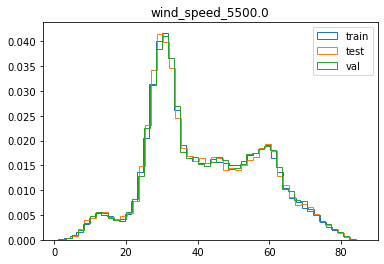

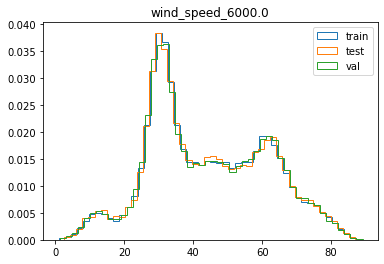

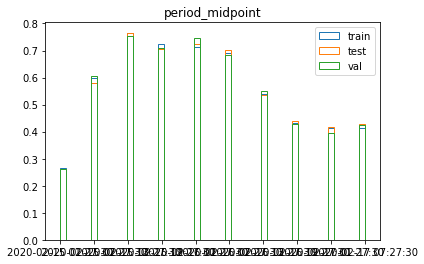

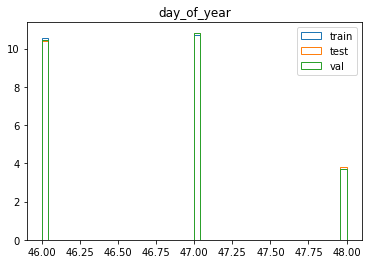

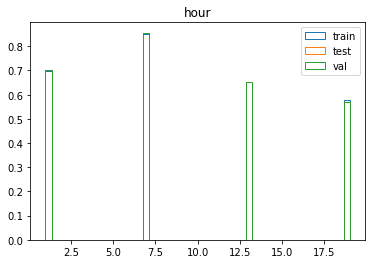

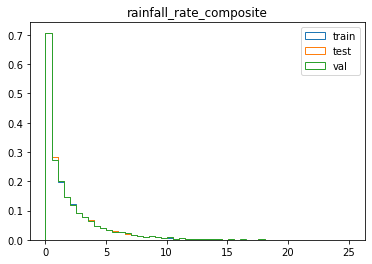

In [11]:
for col in data.columns: 
    plt.hist(training_data[col], bins=50, label='train', histtype='step',density=True)
    plt.hist(test_data[col], bins=50, label='test', histtype='step', density=True)
    plt.hist(val_data[col], bins=50, label='val', histtype='step', density=True)
    plt.legend()
    plt.title(col)
    plt.show()
    